# ДЗ №2 - обучение модели трехслойного перцептрона методом градиентного спуска

## (1)
В качестве теоретического задания в этом ДЗ предлагается провести вывод функции ошибки для задачи регрессии в предположении, что целевая переменная подчиняется распределению Лапласа. Также предлагается воспользоваться байесовским выводом и в том же предположении относительно распределения целевой переменной вывести форму функции потерь с условием лапласовского априорного распределения параметров модели.

## (2)
В этом ДЗ предлагается реализовать модель трехслойного перцептрона и обучение этой модели методом градиентного спуска.

На этот раз предлагается работать с реальными данными. Данные представляют из себя набор рукописных цифр. Это изображения размером 28х28. Каждому изображению поставлен в соответствие класс - арабская цифра. Задача модели - определить цифру, соответствующую произвольному изображению из тестового набора данных.

Так же, как и в ДЗ №1, предлагается реализовать функцию потерь и саму модель перцептрона в манере, схожей с построением модулей фреймворка pytorch.

В решении ожидается наличие следующих ключевых составляющих:<br />

- (текст) формулировка задачи
- (текст) формулировка признакового описания объектов
- (текст, формулы) формулировка модели многослойного перцептрона
- (текст, формулы) формулировка функции ошибки
- (текст, формулы) формулировка меры качества модели
- (текст, код и диаграммы) исследование исходных данных: распределение признаков и другие действия, дающие понимание о характере исходных данных
- (текст, код, диаграммы) фильтрация признаков (при необходимости), порождение признаков (при необходимости)
- (формулы, код, результаты, коммментарии) обучение модели методом градиентного спуска
- (код, результаты, комментарии) оценка качества модели на валидационной выборке

#### Код решения:
(можно использовать предлагаемые шаблоны)
- формулировка модели трехслойного перцептрона. Имеется в виду только один скрытый слой;
- формулировка функции ошибки;
- формулировка метрики (метрик);
- формулировка цикла оптимизации параметров.

#### Визуализация в решении:
- распределение признаков;
- распределение целевой переменной;
- отдельные экземпляры выборки в виде изображений;
- эволюция функции ошибки по ходу обучения;
- эволюция метрики(метрик) по ходу обучения

#### Выводы
- вывод о достаточности или избыточности данных для оценки параметров модели
- вывод о соотношении выразительности модели и ее обобщающей способности (наблюдаются ли явления переобучения или недообучения).

Примечание:<br />
Реализация перцептрона и других составляющих исследования может быть написана только с использованием библиотеки Numpy или scipy. Решения с использованием библиотек автоматического вычисления градиентов не засчитываются.

### Исходные данные

Исходные данные можно скачать [по этой ссылке](https://www.dropbox.com/s/y6ar7i7mb6fvoed/mnist.npz). Набор данных MNIST поставляется в различных вариантах. В варианте, доступном по приведенной ссылке, чтение исходных данных может быть выполнено следующим образом:

```
import numpy as np
mnist = np.load('mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
x_test = mnist['x_test']
y_test = mnist['y_test']
```

### Многослойный перцептрон

Напомним, мы задаем мнолослойный перцептрон как сложную функцию, в которой используются линейные операции и поточечные нелинейные преобразования. Если входные данные (признаковое описание объекта) заданы вектором $x$, то функция перцептрона с одним скрытым слоем выглядит следующим образом:
$$
F(x) = \Psi\left(\phi\left( {x}\cdot\theta_1 + b_1 \right)\cdot\theta_2 + b_2\right),
$$
где $x$ имеется в виду без дополнительного единичного признака; $\phi$ - функция активации скрытого слоя; $\Psi$ - функция активации выходного слоя перцептрона.

Напомним также, что в задаче жесткой многоклассовой классификации на $K$ классов допустим вариант формулировки модели, такой что:
- количество признаков целевой переменной совпадает с количеством классов $K$;
- в качестве функции активации $\Psi$ может использоваться `softmax`:
$$
\Psi(h_i) = \frac{e^{h_i}}{\sum_{j=1}^{K}{e^{h_j}}}
$$
- в качестве функции потерь может использоваться перекрестная энтропия в многоклассовом варианте (приведено в записи для одного объекта):
$$
{\mathscr{L}}\left(\hat{y},y\right) = -\sum_{j=1}^{K}{y_j*ln\left(\hat{y}_j\right)},
$$
где $\hat{y}=F(x)$

В своем решении вы никак не ограничены в выборе функций активации $\phi$ или $\Psi$. Однако есть некоторые устоявшиеся практики применения функций `ReLU, sigmoid, tanh`.

### Особенности реализации функции `softmax`
Несложно заметить, что как в числителе, так и в знаменателе функции `softmax` стоит экспонента некоторого числа. При этом следует понимать, что разрядность чисел с плавающей точкой `float32`, `float64` и даже `float128` не бесконечны. Свойства экспоненты таковы, что, например, для переполнения разрядности чисел `float64` (максимум  $\sim1.78*10^{308}$) достаточно показателя, превышающего 710, что совсем немного. Поэтому в случае практической реализации функции `softmax` имеет смысл предусмотреть случаи, когда аргументы экспоненты велики или, наоборот, слишком малы.

В этом ДЗ кроме прочих заданий вам нужно реализовать вычислительно стабильную версию `softmax`.

### Особенности вычисления градиента функции потерь

В этом домашнем задании, также как и в ДЗ№1 предлагается реализовывать функцию потерь и отдельные вычислительные блоки перцептрона наследующими `Differentiable` для общности восприятия этих модулей как дифференцируемых по своим аргументам. По желанию можно вычислить градиент функции потерь по параметрам модели вручную (и далее реализовать его в коде), однако предпочитаемым способом будет реализация градиента каждого из вычислительных блоков по аргументу в методе `backward()` и использование этого результата в обобщенном виде, без упрощения. Этот вариант вычисления градиента функции потерь по параметрам модели называется "backpropagation" ("метод обратного распространения ошибки" или "метод обратной волны" у разных авторов).

Нелишним будет напомнить, что в некоторых случаях для вычисления компоненты градиента необходимо хранить значения, полученные на этапе вычисления функции $F(x)$. В вашем решении это может быть устроено по-разному. Но для тех, кто хочет придерживаться предложенного шаблона, введен атрибут `state` класса `Differentiable`.

# Решение

## Постановка задачи

Задачей является классификация рукописных цифр на изображениях из датасета MNIST

softmax применяется для нормировки вероятности к единице

## Препроцессинг

In [1]:
import numpy as np
from tqdm import tqdm

In [2]:
#%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
mnist = np.load('./mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
# Обратите внимание на то, что целевая переменная в виде целых чисел от 0 до 9, в то время как в формулах,
# приведенных выше, подразумевается one-hot кодирование целевой переменной
x_test = mnist['x_test']
y_test = mnist['y_test']

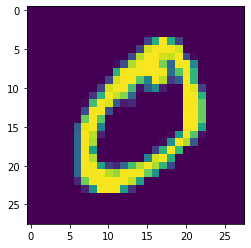

In [5]:
plt.imshow(x_train[1])

In [6]:
y_train[1]

0

выпрямление матрицы в вектор и нормировка

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train = np.array(list(map(lambda x: x.reshape((784))/255, x_train)))
x_test = list(map(lambda x: x.reshape((784))/255, x_test))

In [9]:
x_train.shape

(60000, 784)

In [10]:
frequency = []
for i in range(x_train.shape[-1]):
    counter = 0
    for j in range(x_train.shape[0]):
        if x_train[j][i] == 0:
            counter+=1
    frequency.append(counter/x_train.shape[0])

In [11]:
counter=0
index_to_delete = []
for i in range(len(frequency)):
    if frequency[i]>=0.995:
        counter+=1
        index_to_delete.append(i)
index_to_delete.reverse()
counter

265

In [12]:
index_to_reseve = [i for i in range(len(frequency))]
for i in index_to_delete:
    index_to_reseve.pop(i)


In [13]:
x_train = x_train[:, index_to_reseve]

Добавим столбец единиц

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_model = PolynomialFeatures(degree=1, include_bias=True)

x_train = poly_model.fit_transform(x_train)
x_test = poly_model.fit_transform(x_test)

one-hot encoding можно было бы импортировать из sklearn, но сделаем сами

In [15]:
def one_hot(index=None):
    zero_list = [0]*10
    zero_list[index] = 1
    return zero_list

In [16]:
y_train[1]

0

In [17]:
y_train = np.array(list(map(lambda x: one_hot(x), y_train)))

In [18]:
y_train[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
y_train.shape

(60000, 10)

## Реализация алгоритма

In [20]:
class Differentiable:
    def __init__(self):
        self.state = None
        pass
    
    def forward(self, *args):
        raise NotImplementedError()
    
    def backward(self, *args):
        raise NotImplementedError()

В качестве функции потерь используем перекрестную энтропию   
$$
{\mathscr{L}}\left(\hat{y},y\right) = -\sum_{j=1}^{K}{y_j*ln\left(\hat{y}_j\right)},
$$
где $\hat{y}=F(x)$

In [263]:
class loss(Differentiable):
    def __init__(self):
        super(loss, self).__init__()
    
    def forward(self, y_pred, y_train):
        # Этот метод реализует вычисление значения функции потерь
        # Подсказка: метод должен возвращать единственный скаляр - значение функции потерь
        self.state = y_train  
        self.cache = y_pred
        
        ### YOUR CODE HERE
        loss_value = sum(-sum(self.state * np.log(y_pred)))/self.state.shape[0]
        
        ###################
        #accuracy_counter:#
        ###################
        y_pred = np.array(y_pred)
        counter = 0
        for i in range(len(y_pred)):
            if np.where(y_pred[i]==max(y_pred[i]))[0][0] == np.where(y_train[i]==max(y_train[i]))[0][0]:
                counter+=1
            else: 
                print('y_train', y_train[i])
                print('y_pred', y_pred[i])
        accuracy = counter/len(y_pred)
        print('--------------------------')
    
                
        return loss_value, accuracy
    
    
    def backward(self, out_shape):
        # Этот метод реализует вычисление градиента функции потерь по аргументу y_pred
        # Подсказка: метод должен возвращать вектор градиента функции потерь
        #           размерностью, совпадающей с размерностью аргумента y_pred
        
        ### YOUR CODE HERE
        y_pred = self.cache
        partial_grad = (y_pred - self.state).T 
        
        return partial_grad.reshape(1, out_shape)

In [316]:
class Linear(Differentiable):
    def __init__(self):
        super(Linear, self).__init__()
        self.theta = None
    
    def __call__(self, x_train):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(x_train)
    
    def backward(self, upstream_grad, flag, out_shape):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        ### YOUR CODE HERE
        in_shape = upstream_grad.shape[-1]
        
        if flag == 'theta':
            local_grad = []
            for i in range(self.y_pred.shape[0]):
                for j in range(self.y_pred.shape[1]):
                    cell_grad=[]
                    for local_j in range(self.theta.shape[1]):
                        if local_j == j:
                            cell_grad.append(self.cache_x_train[i])
                        else:
                            cell_grad.append(np.zeros(len(self.cache_x_train[i])))
                    cell_grad = np.array(cell_grad).T
                    local_grad.append(cell_grad)
                    
            local_grad = np.array(local_grad)
#             print('local_grad \n',local_grad)
#             print('cache_x_train \n', self.cache_x_train)
            #local_grad = local_grad.reshape(in_shape, out_shape, order='F')
            local_grad = local_grad.reshape(in_shape, out_shape)
#             print('----------------------')
#             print('local_grad \n',local_grad) 
                    
            partial_grad = upstream_grad @ local_grad
            
        if flag == 'x_train':
            
            local_grad = []
            for i in range(self.y_pred.shape[0]):
                for j in range(self.y_pred.shape[1]):
                    cell_grad=[]
                    for local_i in range(self.cache_x_train.shape[0]):
                        if local_i == i:
                            cell_grad.append(np.array(self.theta[:,j]))
                        else:
                            cell_grad.append(np.zeros(len(self.theta[:,j])))
                    
                    local_grad.append(cell_grad)
            
            local_grad = np.array(local_grad) 
            local_grad = local_grad.reshape(in_shape, out_shape)        
            partial_grad = upstream_grad @ local_grad
            
        return partial_grad

    
    def forward(self, x_train):
        # этот метод предназначен для применения модели к данным
        assert x_train.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"
        
#         x_train = poly_model.fit_transform(x_train)
        
        if (self.theta is None):
            # Если вектор параметров еще не инициализирован, его следует инициализировать
            # Подсказка: длина вектора параметров может быть получена из размера матрицы X

            ### YOUR CODE HERE
            self.theta = np.random.randn(x_train.shape[-1]*10).reshape(x_train.shape[-1],10) 
        
        
        # Здесь следует собственно применить модель к входным данным
        
        ### YOUR CODE HERE
        
        y_pred = x_train@self.theta 
        
        self.y_pred = y_pred
        self.cache_x_train = x_train
        self.cache_theta = self.theta
        
        return y_pred

In [308]:
class Activation(Differentiable):
    def __init__(self):
        super(Activation, self).__init__()
        self.theta = None
    
    def __call__(self, x_train):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(x_train)
    
    def backward(self, upstream_grad):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        ### YOUR CODE HERE
        
        local_grad = []
        for i in range(self.value_sign.shape[0]):
            for j in range(self.value_sign.shape[1]):
                cell_grad = np.zeros(self.value_sign.shape)
                cell_grad[i][j] = np.maximum(self.value_sign[i][j], 0)
                local_grad.append(cell_grad)
        local_grad = np.array(local_grad)
            
        local_grad = local_grad.reshape(upstream_grad.shape[-1], upstream_grad.shape[-1])
                
        partial_grad =  upstream_grad @ local_grad
        
        return partial_grad
    
    def forward(self, x_train):
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy

        ### YOUR CODE HERE
        self.value_sign = np.sign(x_train)
    
        y_pred = np.maximum(x_train, 0)
        
        return y_pred

In [309]:
class Softmax(Differentiable):
    def __init__(self):
        super(Softmax, self).__init__()
        self.theta = None
    
    def __call__(self, *args):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(x_train)
    
    def backward(self):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        ### YOUR CODE HERE
        partial_grad = np.zeros((x_train.shape))
        softmax_val = self.forward_val
        
        for i in range(partial_grad.shape[0]*len(softmax_val[0])):
            for j in range(partial_grad.shape[1]):
                if i != j:
                    partial_grad[i:i+len(softmax_val[i])][j] = softmax_val[i] * softmax_val[j]
                else:
                    partial_grad[i:i+len(softmax_val[i])][j] = softmax_val[i]*(1 - softmax_val[i])
        
        return partial_grad 
    
    def forward(self, y_in):
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy

        ### YOUR CODE HERE
        y_pred_out = []
        for line in y_in:
            shift = line - np.max(line)
            exps = np.exp(shift)
            y_pred_line = exps / np.sum(exps)
            
            y_pred_out.append(y_pred_line)

        self.forward_val = y_pred_out
        
        return y_pred_out

In [310]:
class Perceptron(Differentiable):
    def __init__(self):
        super(Perceptron, self).__init__()
        
        self.Sm=Softmax()
        self.activ=Activation()
        self.lr_1=Linear()
        self.lr_2=Linear()
        self.parameters = None
        
    
    def __call__(self, *args):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(x_train)
    
    def backward(self, x_train, upstream_grad, theta):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        self.theta = theta
        
        upstream_grad_1 = self.lr_2.backward(upstream_grad, 'x_train',  x_train.shape[0]*10)
        upstream_grad_1 = self.activ.backward(upstream_grad_1).T
        
        grad_1 = self.lr_1.backward(upstream_grad_1.T, 'theta', self.theta.shape[0]*self.theta.shape[1])

#         partial_grad_2 = self.lr_2.backward(upstream_grad, 'theta')
        partial_grad_2 = None
        
        return grad_1, partial_grad_2
    
    def forward(self, x_train):
        # Здесь следует собственно применить модель к входным данным
        # Подсказка: удобно расширить матрицу X дополнительным признаком,
        #            чтобы применять матричные операции, очень эффективно реализованные в numpy
        
        y_pred = self.Sm.forward(self.lr_2.forward(self.activ.forward(self.lr_1.forward(x_train))))
        
        return y_pred

In [311]:
def train_loop(x_train, y_train, model, loss_fn, epochs=100):
    #np.random.seed(1)
    loss_history = []
    accuracy_history = []
    pbar = tqdm(total=epochs)
    
    for epoch in range(epochs):
        # В этом цикле следует реализовать итеративную процедуру оптимизации параметров модели model,
        #        руководствуясь функцией потерь loss_fn
        
        ### YOUR CODE HERE
        #batch selection
        batch_size = 1
        alpha = 1e-2
        
        sh = list(range(x_train.shape[0])) 
        #np.random.shuffle(sh)
        sh = sh[:batch_size]
        
        x_batch_train = x_train[sh,:]
        y_batch_train = y_train[sh,:]

            
        loss_value, accuracy = loss_fn.forward(model.forward(x_batch_train), y_batch_train)
        grad_1, grad_2 = model.backward(x_batch_train, loss_fn.backward(x_batch_train.shape[0]*10), model.lr_1.theta)

        grad_1 = grad_1.reshape(model.lr_1.theta.shape)
        model.lr_1.theta = model.lr_1.theta - alpha*grad_1
        #model.lr_2.theta = model.lr_2.theta - alpha*grad_2.T

        
        loss_history.append(loss_value)
        accuracy_history.append(accuracy)
        pbar.update(1)
        #print(loss_value)
        pbar.set_postfix({'loss': loss_value, 'accuracy': accuracy})
        print('----------------')
    pbar.close()
    return loss_history, accuracy_history

In [318]:
obj_fn = loss()
model = Perceptron()
loss_history, accuracy_history = train_loop(x_train, y_train, model, obj_fn, epochs=10)














































  0%|          | 0/10 [00:00<?, ?it/s]












































 10%|█         | 1/10 [00:00<00:00, 46.96it/s, loss=46.9, accuracy=0]












































 20%|██        | 2/10 [00:00<00:00, 48.06it/s, loss=25.7, accuracy=0]












































 30%|███       | 3/10 [00:00<00:00, 48.23it/s, loss=9.31, accuracy=0]












































 40%|████      | 4/10 [00:00<00:00, 48.08it/s, loss=7.64, accuracy=0]












































 50%|█████     | 5/10 [00:00<00:00, 49.00it/s, loss=7.64, accuracy=0]












































 50%|█████     | 5/10 [00:00<00:00, 49.00it/s, loss=6.01, accuracy=0]












































 60%|██████    | 6/10 [00:00<00:00, 49.00it/s, loss=4.39, accuracy=0]












































 70%|███████   | 7/10 [00:00<00:00, 49.00it/s, loss=2.83, accuracy=0]






y_train [0 0 0 0 0 1 0 0 0 0]
y_pred [3.37870848e-22 1.00000000e+00 1.38258719e-16 6.40647907e-23
 5.35136053e-19 4.17093342e-21 2.74809165e-20 5.49117208e-19
 2.68966300e-13 1.85304161e-10]
--------------------------
----------------
y_train [0 0 0 0 0 1 0 0 0 0]
y_pred [3.65035568e-17 9.99999893e-01 4.25519026e-13 1.64611525e-17
 1.09557328e-16 6.95491667e-12 1.87923896e-16 2.17878051e-15
 1.01701967e-07 5.74197087e-09]
--------------------------
----------------
y_train [0 0 0 0 0 1 0 0 0 0]
y_pred [1.76382856e-12 9.93790273e-01 2.63469765e-10 7.87345197e-13
 1.59037481e-14 9.08089046e-05 5.92456472e-13 4.17632663e-12
 6.11884957e-03 6.83860862e-08]
--------------------------
----------------
y_train [0 0 0 0 0 1 0 0 0 0]
y_pred [4.77830983e-11 9.89776743e-01 6.05240171e-10 4.71082410e-12
 1.23074779e-13 4.80973908e-04 4.85050747e-12 4.98036837e-12
 9.74208825e-03 1.93711822e-07]
--------------------------
----------------
y_train [0 0 0 0 0 1 0 0 0 0]
y_pred [1.23892407e-09 9.82748














































100%|██████████| 10/10 [00:00<00:00, 44.08it/s, loss=0.696, accuracy=1]












































100%|██████████| 10/10 [00:00<00:00, 44.08it/s, loss=0.375, accuracy=1]

----------------
--------------------------
----------------


In [ ]:
plt.plot(loss_history)
plt.title('loss function train')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.show()
plt.plot(accuracy_history)
plt.title('accuracy train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## Анализ результатов

In [80]:
import numpy as np
b = np.array([[[1],[1],[1]], [[2],[2],[2]], [[3],[3],[3]]])

# b.reshape(9,1)
b.shape
b.reshape(9,1)

array([[1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3]])

In [ ]:
b

In [126]:
a = np.array(np.zeros((2, 2)), dtype=np.object)

In [129]:
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        a[i][j] = [5,1]
a

array([[list([5, 1]), list([5, 1])],
       [list([5, 1]), list([5, 1])]], dtype=object)

In [130]:
a.shape

(2, 2)